In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import jupytertools
% matplotlib nbagg

ON = 255
OFF = 0
vals = [ON, OFF]

In [73]:
def randomWalk(particle):
    x,y = particle
    x_random = np.random.random()
    d = 1
    if (x_random > 0.75):
        x = x + d
    elif (x_random < 0.75 and x_random > 0.5):
        x = x - d
    elif (x_random < 0.5 and x_random > 0.25):
        y = y + d
    else:
        y = y - d
        
    return (x,y)

In [67]:
def adjacent(particle,shape):
    for s in shape:
        if (abs(s[0] - particle[0]) == 1 and abs(s[1] - particle[1]) == 1):
            return True
    
    return False

In [128]:
def step(grid,particle,shape):
    N = grid.shape[0]                
    x,y = particle
    
    if (adjacent(particle,shape) or x == 0 or y == 0 or x == N-1 or y == N-1):
        shape.append(particle)
        grid[N/2][N/2] = ON
        particle = (N/2,N/2)
    else:
        grid[x,y] = OFF
        x_new, y_new = randomWalk(particle)
        grid[x_new,y_new] = ON
    
    return grid,shape,particle

In [139]:
grid = np.zeros((11,11))
grid[5][5] = ON
shape = []
fig, ax = plt.subplots()
mat = ax.matshow(grid)
N = grid.shape[0]
    
current_particle = (5,5)
    
def newAnimate(i):
    global grid
    global current_particle
    global shape
    global N
    new_grid = grid.copy()
    x,y = current_particle
    
    #new_grid,shape,current_particle = step(grid,curent_particle,shape)
    current_particle = randomWalk(current_particle)
    x_new,y_new = current_particle
    if (x_new > 0 and y_new > 0 and x_new < N-1 and y_new < N-1):
        if (new_grid[x_new-1,y_new-1] + 
            new_grid[x_new,y_new-1] + 
            new_grid[x_new+1,y_new+1] +
            new_grid[x_new-1,y_new+1] + 
            new_grid[x_new,y_new+1] + 
            new_grid[x_new+1,y_new+1] +
            new_grid[x_new+1,y_new] +
            new_grid[x_new+1,y_new] > 0):
            #
            new_grid[x_new,y_new] = ON
            current_particle = (N//2,N//2)
            new_grid[N//2,N//2] = ON
        else:
            new_grid[x,y] = OFF
            new_grid[x_new,y_new] = ON
    else:
        
        
    mat.set_data(new_grid)
    grid = new_grid
    return [mat]

# Create the animation object which will do our animaiton.

ani = animation.FuncAnimation(fig, newAnimate, interval=25)

# Display the animation
plt.show()

IndentationError: expected an indented block (<ipython-input-139-baf1dca970e1>, line 40)

<IPython.core.display.Javascript object>


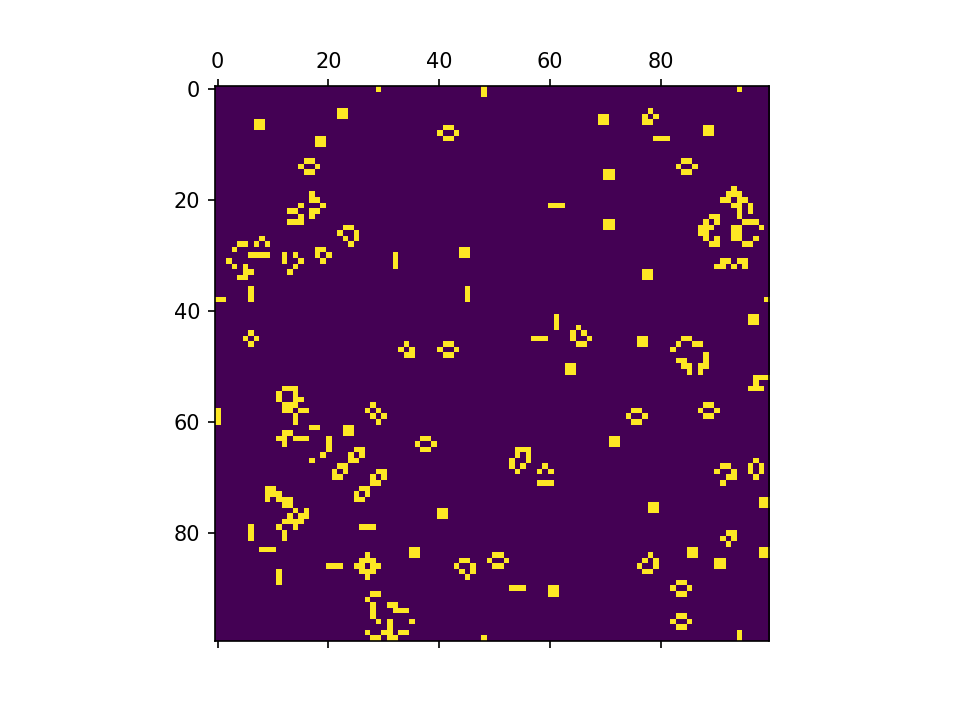

In [83]:
N = 100
ON = 255
OFF = 0
vals = [ON, OFF]

# populate grid with random on/off - more off than on
grid = np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)

def update(data):
  global grid
  # copy grid since we require 8 neighbors for calculation
  # and we go line by line 
  newGrid = grid.copy()
  for i in range(N):
    for j in range(N):
      # compute 8-neghbor sum 
      # using toroidal boundary conditions - x and y wrap around 
      # so that the simulaton takes place on a toroidal surface.
      total = (grid[i, (j-1)%N] + grid[i, (j+1)%N] + 
               grid[(i-1)%N, j] + grid[(i+1)%N, j] + 
               grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] + 
               grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255
      # apply Conway's rules
      if grid[i, j]  == ON:
        if (total < 2) or (total > 3):
          newGrid[i, j] = OFF
      else:
        if total == 3:
          newGrid[i, j] = ON
  # update data
  mat.set_data(newGrid)
  grid = newGrid
  return [mat]

# set up animation
fig, ax = plt.subplots()
mat = ax.matshow(grid)
ani = animation.FuncAnimation(fig, update, interval=50,
                              save_count=50)
plt.show()